In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.spatial import distance

In [2]:
# Example data points (PSNR, Number of Gaussians)
data = np.array([
    [31.403905868530273, 54465],
    [31.175954818725586, 28619],
    [31.973905563354492, 392080],
    [30.986774444580078, 19542],
    [31.39571189880371, 53709],
    [29.902692794799805, 4740],
    [30.581106185913086, 10730],
    [30.9303035736084, 19286],
    [30.516178131103516, 10372],
    [31.424161911010742, 53650],
    [31.703964233398438, 118596],
    [31.795148849487305, 185006],
    [31.982515335083008, 408555],
    [31.79252052307129, 176591],
    #[32.206417083740234, 1622234],
    [32.606417083740234, 1622234],
    [31.4155216217041, 55198],
    [31.8895206451416, 148196],
    [31.103710174560547, 23160],
    [31.954200744628906, 181338],
    [31.667980194091797, 78598],
    [32.09264373779297, 290869],
    [30.663375854492188, 13364],
    [31.007667541503906, 19636],
    [29.968061447143555, 11018],
])

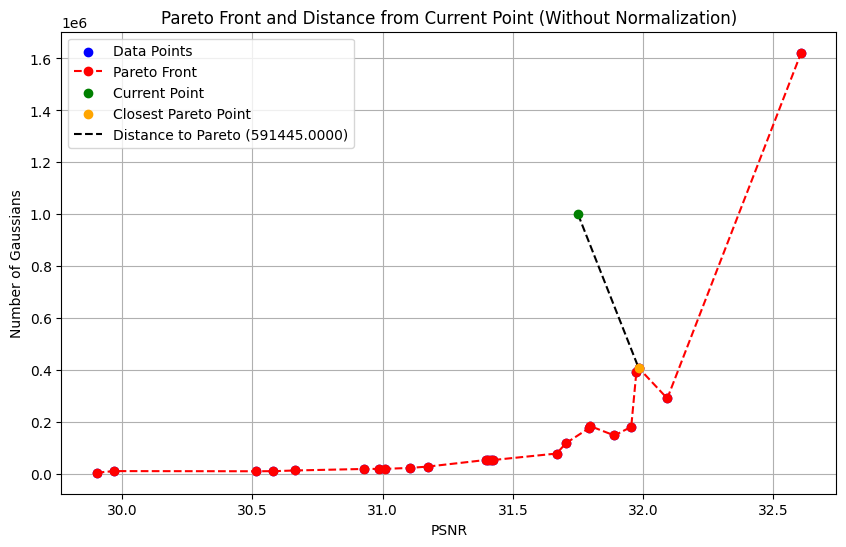

In [3]:
# Example without normalization as per request

# Using the preprocessed data, assuming no further normalization is needed

# Compute the Pareto front using convex hull approximation (assuming sorted by PSNR)
pareto_front = data[np.argsort(data[:, 0])]  # Already sorted data points

# Current point (already preprocessed)
current_point = np.array([31.75, 1000000])
# Calculate distances from the current point to all points on the Pareto front
distances = np.sqrt(np.sum((pareto_front - current_point) ** 2, axis=1))

# Find the minimum distance (i.e., closest point on Pareto front)
min_distance = np.min(distances)
closest_pareto_point = pareto_front[np.argmin(distances)]

# Plot the data
plt.figure(figsize=(10, 6))

# Plot all data points
plt.scatter(data[:, 0], data[:, 1], label='Data Points', color='blue')

# Plot Pareto front
plt.plot(pareto_front[:, 0], pareto_front[:, 1], label='Pareto Front', color='red', linestyle='--', marker='o')

# Plot current point
plt.scatter(current_point[0], current_point[1], color='green', label='Current Point', zorder=5)

# Plot closest point on Pareto front
plt.scatter(closest_pareto_point[0], closest_pareto_point[1], color='orange', label='Closest Pareto Point', zorder=5)

# Draw line between current point and closest point on Pareto front
plt.plot([current_point[0], closest_pareto_point[0]], [current_point[1], closest_pareto_point[1]], 
         color='black', linestyle='--', label=f'Distance to Pareto ({min_distance:.4f})')

# Labels and title
plt.xlabel('PSNR')
plt.ylabel('Number of Gaussians')
plt.title('Pareto Front and Distance from Current Point (Without Normalization)')
plt.legend()
plt.grid(True)

plt.show()

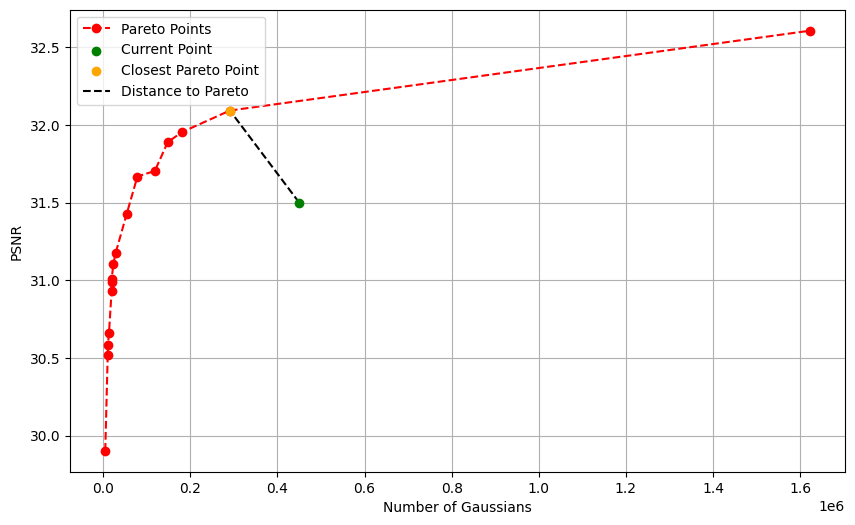

In [4]:
# Switched x and y

# Swap columns so that Number of Gaussians is in column 0 and PSNR is in column 1
changed_data = data[:, [1, 0]]

# Now, data[:, 0] is Number of Gaussians, and data[:, 1] is PSNR

# Sort data by Number of Gaussians (ascending order)
sorted_data = changed_data[np.argsort(changed_data[:, 0])]

# Compute the Pareto front
pareto_front = []
max_psnr = -np.inf

for point in sorted_data:
    num_gaussians, psnr = point
    if psnr > max_psnr:
        pareto_front.append(point)
        max_psnr = psnr

pareto_front = np.array(pareto_front)

# Current point (Number of Gaussians, PSNR)
current_point = np.array([450000, 31.5])

# Calculate distances from the current point to all points on the Pareto front
distances = np.sqrt(np.sum((pareto_front - current_point) ** 2, axis=1))

# Find the closest point on the Pareto front
min_distance = np.min(distances)
closest_pareto_point = pareto_front[np.argmin(distances)]

# Plot the data
plt.figure(figsize=(10, 6))

# Plot all data points
#plt.scatter(changed_data[:, 0], changed_data[:, 1], label='Data Points', color='blue')

# Plot Pareto front
plt.plot(pareto_front[:, 0], pareto_front[:, 1], label='Pareto Points', color='red', linestyle='--', marker='o')

# Plot current point
plt.scatter(current_point[0], current_point[1], color='green', label='Current Point', zorder=5)

# Plot closest point on Pareto front
plt.scatter(closest_pareto_point[0], closest_pareto_point[1], color='orange', label='Closest Pareto Point', zorder=5)

# Draw a line between the current point and the closest point on Pareto front
plt.plot(
    [current_point[0], closest_pareto_point[0]],
    [current_point[1], closest_pareto_point[1]],
    color='black',
    linestyle='--',
    label=f'Distance to Pareto' #({min_distance:.4f})'
)

# Labels and title
plt.xlabel('Number of Gaussians')
plt.ylabel('PSNR')
#plt.title('Pareto Front and Distance from Current Point (Without Normalization)')
plt.legend()
plt.grid(True)

plt.show()

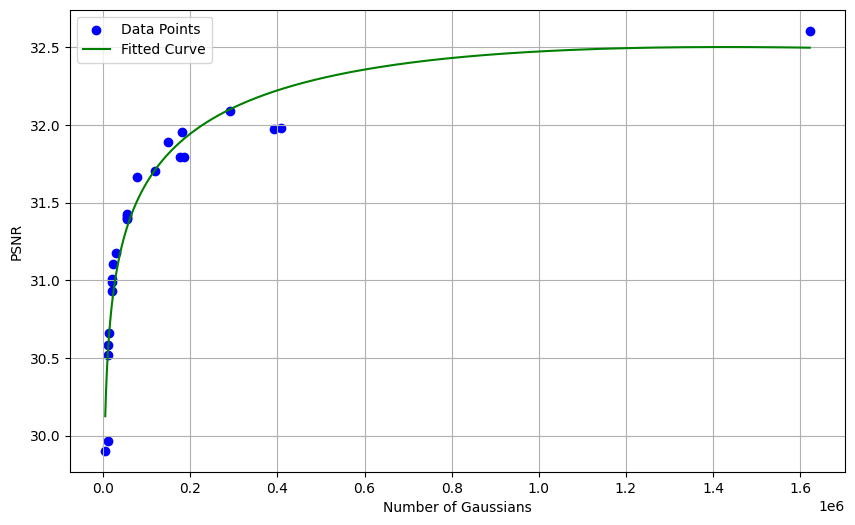

11.303486416208592

In [5]:
# Extracting PSNR and Number of Gaussians
psnr = data[:, 0]
gaussians = data[:, 1]

# Define a model function to fit the data (polynomial)
def model_func(x, a, b, c):
    return a * np.log(x) + b * x + c

# Fit the model to the data
popt, _ = curve_fit(model_func, gaussians, psnr)

# Generate points for plotting the fitted curve
x_fit = np.linspace(min(gaussians), max(gaussians), 50000)
y_fit = model_func(x_fit, *popt)

# Pick a random point and calculate the closest distance to the curve
random_point = np.array([np.random.uniform(min(gaussians), max(gaussians)), np.random.uniform(min(psnr), max(psnr))])
distances = np.sqrt((x_fit - random_point[0])**2 + (y_fit - random_point[1])**2)
closest_index = np.argmin(distances)
closest_point = np.array([x_fit[closest_index], y_fit[closest_index]])

# Plot the data points, fitted curve, random point, and the closest point
plt.figure(figsize=(10, 6))
plt.scatter(gaussians, psnr, label='Data Points', color='blue')
plt.plot(x_fit, y_fit, label='Fitted Curve', color='green')
#plt.scatter(random_point[0], random_point[1], label='Random Point', color='red')
#plt.scatter(closest_point[0], closest_point[1], label='Closest Point on Curve', color='orange')
#plt.plot([random_point[0], closest_point[0]], [random_point[1], closest_point[1]], color='gray', linestyle='--')

# Add labels and legend
plt.xlabel('Number of Gaussians')
plt.ylabel('PSNR')
#plt.title('Fitted Function and Closest Distance to Random Point')
plt.legend()
plt.grid(True)
plt.show()

# Output the distance between the random point and the closest point on the curve
closest_distance = np.linalg.norm(random_point - closest_point)
closest_distance

In [6]:
# Define a function to compute the normalized distance
def normalized_distance(point1, point2, psnr_range, gaussians_range):
    psnr_diff = (point1[1] - point2[1]) / psnr_range
    gaussians_diff = (point1[0] - point2[0]) / gaussians_range
    return np.sqrt(psnr_diff**2 + gaussians_diff**2)

In [7]:
# Define functions to handle the process for multiple sample points

def fit_curve_and_find_closest_points(data, sample_points):
    """
    This function fits a curve to the given data, finds the closest points on the curve to the provided sample points,
    and calculates the normalized distances. It also plots everything, including the distances printed next to the
    lines that represent the distances.
    
    Parameters:
    data (numpy array): The data points with PSNR and Number of Gaussians.
    sample_points (list of tuples): List of sample points for which the closest points and distances need to be calculated.
    """
    psnr = data[:, 0]
    gaussians = data[:, 1]
    
    # Define the range of PSNR and Gaussians for normalization
    psnr_min, psnr_max = min(psnr), max(psnr)
    gaussians_min, gaussians_max = min(gaussians), max(gaussians)
    psnr_range = psnr_max - psnr_min
    gaussians_range = gaussians_max - gaussians_min
    
    # Fit the model to the data
    popt, _ = curve_fit(model_func, gaussians, psnr)
    
    # Generate points for plotting the fitted curve
    x_fit = np.linspace(min(gaussians), max(gaussians), 50000)
    y_fit = model_func(x_fit, *popt)
    
    # Plot the data points and fitted curve
    plt.figure(figsize=(10, 6))
    plt.scatter(gaussians, psnr, label='Data Points', color='blue')
    plt.plot(x_fit, y_fit, label='Fitted Curve', color='green')
    
    for sample_point in sample_points:
        # Calculate the normalized distance for each point on the curve
        normalized_distances = np.array([normalized_distance(sample_point, np.array([x_fit[i], y_fit[i]]), psnr_range, gaussians_range) for i in range(len(x_fit))])
        # Find the closest point based on the normalized distance
        closest_index = np.argmin(normalized_distances)
        closest_point = np.array([x_fit[closest_index], y_fit[closest_index]])
        
        # Plot the sample point and the closest point, and draw the line representing the distance
        plt.scatter(sample_point[0], sample_point[1], color='red')#label=f'Random Point ({sample_point[0]:.2f}, {sample_point[1]:.2f})', color='red')
        plt.scatter(closest_point[0], closest_point[1], color='orange')#label='Closest Point', color='orange')
        plt.plot([sample_point[0], closest_point[0]], [sample_point[1], closest_point[1]], color='gray', linestyle='--')
        
        # Annotate the distance on the plot
        distance_value = normalized_distances[closest_index]
        midpoint = [(sample_point[0] + closest_point[0]) / 2, (sample_point[1] + closest_point[1]) / 2]
        plt.text(midpoint[0], midpoint[1], f'{distance_value:.2f}', fontsize=10, color='black')
    
    # Add labels and legend
    plt.xlabel('Number of Gaussians')
    plt.xscale('log')
    plt.ylabel('PSNR')
    plt.title('Fitted Function and Normalized Distances to Sample Points')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)
    plt.show()


In [8]:
def fit_curve_and_find_closest_points_2(data, sample_points):
    """
    This function fits a curve to the given data, finds the PSNR associated with the sample point's number of Gaussians,
    and calculates the PSNR distances. It also plots everything, including the distances printed next to the
    lines that represent the distances.
    
    Parameters:
    data (numpy array): The data points with PSNR and Number of Gaussians.
    sample_points (list of tuples): List of sample points for which the PSNR distance needs to be calculated.
    """
    psnr = data[:, 0]
    gaussians = data[:, 1]
    
    # Example model function (assuming you have a model for the curve)
    def model_func(x, a, b, c):
        return a * np.log(x + b) + c
    
    # Fit the model to the data
    popt, _ = curve_fit(model_func, gaussians, psnr)
    
    # Generate points for plotting the fitted curve
    x_fit = np.linspace(min(gaussians), max(gaussians), 50000)
    y_fit = model_func(x_fit, *popt)
    
    # Plot the data points and fitted curve
    plt.figure(figsize=(10, 6))
    plt.scatter(gaussians, psnr, label='Data Points', color='blue')
    plt.plot(x_fit, y_fit, label='Fitted Curve', color='green')
    
    for sample_point in sample_points:
        gaussians_sample = sample_point[0]  # The number of Gaussians from the sample point
        psnr_sample = sample_point[1]  # The PSNR from the sample point
        
        # Get the PSNR corresponding to the same number of Gaussians on the fitted curve
        psnr_curve = model_func(gaussians_sample, *popt)
        
        # Compute the PSNR distance between the sample point and the curve's PSNR for the same number of Gaussians
        psnr_distance = np.abs(psnr_sample - psnr_curve)
        
        # Plot the sample point and draw the line representing the distance to the curve
        plt.scatter(gaussians_sample, psnr_sample, color='red')#, label='Sample Point')  # Sample point
        plt.scatter(gaussians_sample, psnr_curve, color='orange')#, label='PSNR on Curve')  # Corresponding point on the curve
        plt.plot([gaussians_sample, gaussians_sample], [psnr_sample, psnr_curve], color='gray', linestyle='--')
        
        # Annotate the distance on the plot
        midpoint = [gaussians_sample, (psnr_sample + psnr_curve) / 2]
        plt.text(midpoint[0], midpoint[1], f'{psnr_distance:.2f}', fontsize=10, color='black')
        
        # Print distances for debugging
        #print(f"Sample point (Gaussians, PSNR): {sample_point}")
        #print(f"PSNR on curve for {gaussians_sample} Gaussians: {psnr_curve}")
        #print(f"PSNR distance: {psnr_distance:.2f}")

    # Add labels and legend
    plt.xlabel('Number of Gaussians')
    plt.ylabel('PSNR')
    plt.xscale('log')
    plt.title('Fitted Function and PSNR Distances to Sample Points')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)
    plt.show()


In [9]:
# Sample usage with multiple points
sample_points = [
    #[np.random.uniform(min(gaussians), max(gaussians)), np.random.uniform(min(psnr), max(psnr))],
    #[np.random.uniform(min(gaussians), max(gaussians)), np.random.uniform(min(psnr), max(psnr))],
    #[np.random.uniform(min(gaussians), max(gaussians)), np.random.uniform(min(psnr), max(psnr))],
    #[np.random.uniform(min(gaussians), max(gaussians)), np.random.uniform(min(psnr), max(psnr))],
    #[np.random.uniform(min(gaussians), max(gaussians)), np.random.uniform(min(psnr), max(psnr))],
    #[np.random.uniform(min(gaussians), max(gaussians)), np.random.uniform(min(psnr), max(psnr))],
    #[np.random.uniform(min(gaussians), max(gaussians)), np.random.uniform(min(psnr), max(psnr))],
    [431734, 31.02023696899414],
    [322615, 30.979270935058594],
    [809919, 31.106069564819336],
    [194271, 30.883953094482422],
    [192008, 30.889671325683594],
    [126336, 30.776287078857422],
    [800410, 31.103490829467773],
    [433317, 31.026897430419922],
    [3077320, 31.221355438232422],
    [46620, 30.41434669494629],
    [125401, 30.782358169555664],
    [11707, 28.79196548461914],
    [11707, 28.765697479248047],
    [11756, 28.848358154296875],
    [11847, 28.819889068603516],
    [11790, 28.735763549804688],
    [11797, 28.806800842285156],
    [11801, 28.771018981933594],
    [11754, 28.761125564575195],
    [11860, 28.772171020507812],
    [124736, 30.798770904541016],
    [334457, 28.448699951171875],
    [11701, 28.782888412475586],
    [124275, 30.787363052368164],
    [11798, 28.841487884521484],
    [22081, 30.256092071533203],
    [11794, 28.789207458496094],
    [11844, 28.812732696533203],
    [11843, 28.808612823486328],
    [11868, 28.802898406982422],
    [11850, 28.795406341552734],
    [126341, 30.794055938720703],
    [72564, 31.5203037],
    [104720, 30.8679733],
    [164407, 30.916606903076172],
    [181927, 31.007835388183594],
    [187170, 31.022172927856445],
    [163366, 27.819963455200195],
    [70350, 30.734006881713867],
    [146482, 27.667579650878906],
    [1514422, 31.4638729095459],
    [109338, 28.126373291015625],
    [581383, 31.352603912353516],
    [233455, 31.164796829223633],
    [393862, 31.276187896728516],
    [266770, 28.352548599243164],
    [707788, 31.327606201171875],
    [129728, 30.747390747070312],
    [102544, 30.55445671081543],
    [54465, 31.403905868530273],
    [28619, 31.175954818725586],
    [392080, 31.973905563354492],
    [19542, 30.986774444580078],
    [53709, 31.39571189880371],
    [4740, 29.902692794799805],
    [10730, 30.581106185913086],
    [19286, 30.9303035736084],
    [10372, 30.516178131103516],
    [53650, 31.424161911010742],
    [118596, 31.703964233398438],
    [185006, 31.795148849487305],
    [408555, 31.982515335083008],
    [176591, 31.79252052307129],
    [1622234, 32.206417083740234],
    [55198, 31.4155216217041],
    [148196, 31.8895206451416],
    [23160, 31.103710174560547],
    [181338, 31.954200744628906],
    [78598, 31.667980194091797],
    [290869, 32.09264373779297],
    [13364, 30.663375854492188],
    [19636, 31.007667541503906],
    [11018, 29.968061447143555]
]


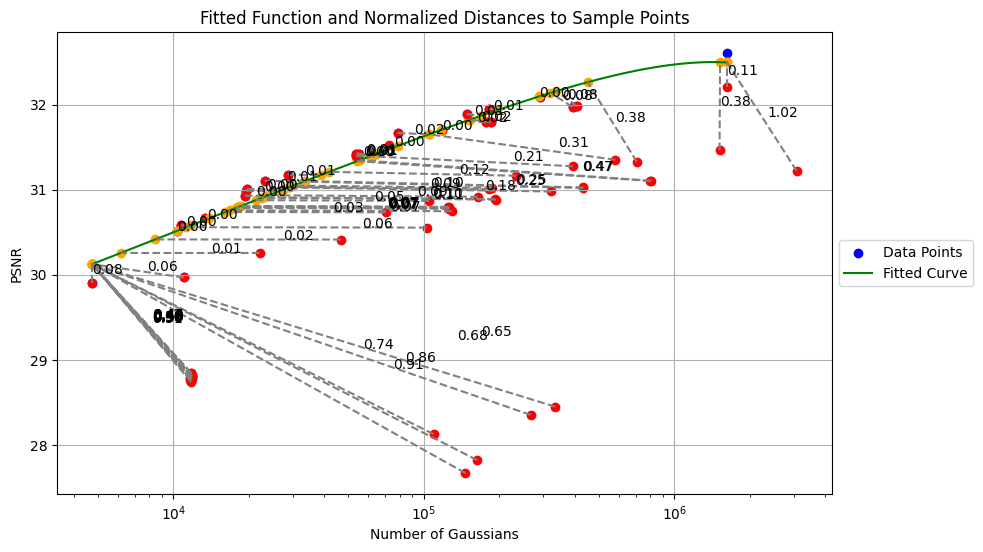

In [10]:
fit_curve_and_find_closest_points(data, sample_points)

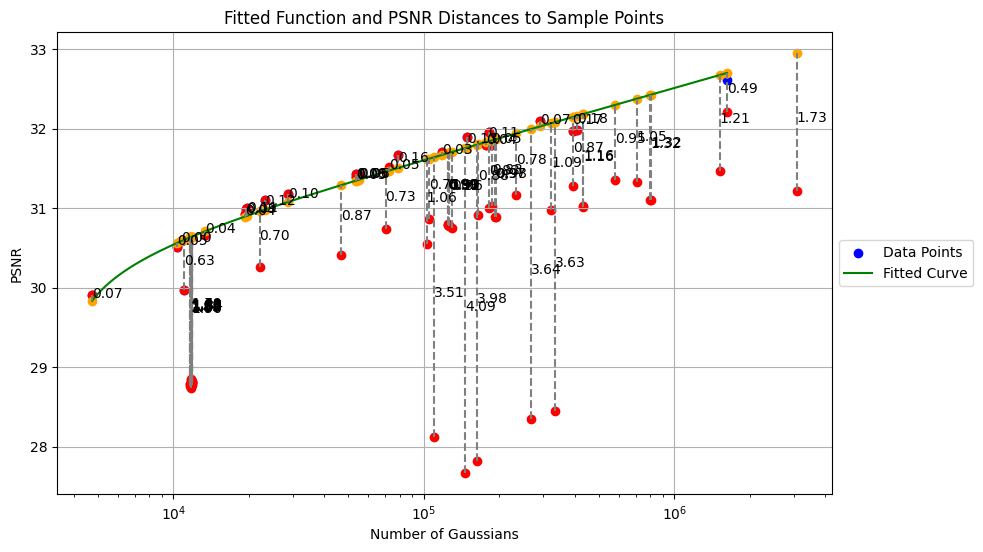

In [11]:
# This is using the psnr as the complete distance
fit_curve_and_find_closest_points_2(data, sample_points)

In [12]:
# Saving the fitted line data (x_fit and y_fit) to a file for use in another script

# Save the data to a numpy file
np.savez('fitted_curve_data.npz', x_fit=x_fit, y_fit=y_fit)

# The data is saved in 'fitted_curve_data.npz' file which can be imported in another script. 
# To load the data in another script, use:
# data = np.load('fitted_curve_data.npz')
# x_fit = data['x_fit']
# y_fit = data['y_fit']

In [13]:
data = np.load('fitted_curve_data.npz')
x_fit = data['x_fit']
y_fit = data['y_fit']
min(x_fit)

4740.0

In [14]:
import numpy as np

def calculate_distance_to_curve(fitted_curve_file, random_point):
    # Load the fitted curve data
    data = np.load(fitted_curve_file)
    x_fit = data['x_fit']
    y_fit = data['y_fit']
    
    # Define the ranges based on the saved fitted curve for normalization
    psnr_min, psnr_max = min(y_fit), max(y_fit)
    gaussians_min, gaussians_max = min(x_fit), max(x_fit)
    psnr_range = psnr_max - psnr_min
    gaussians_range = gaussians_max - gaussians_min
    
    # Function to calculate normalized distance
    def normalized_distance(point1, point2, psnr_range, gaussians_range):
        psnr_diff = (point1[1] - point2[1]) / psnr_range
        gaussians_diff = (point1[0] - point2[0]) / gaussians_range
        return np.sqrt(psnr_diff**2 + gaussians_diff**2)
    
    # Calculate the normalized distance for each point on the curve
    normalized_distances = np.array([normalized_distance(random_point, np.array([x_fit[i], y_fit[i]]), psnr_range, gaussians_range) for i in range(len(x_fit))])
    
    # Find the closest point on the curve
    closest_index = np.argmin(normalized_distances)
    closest_point = np.array([x_fit[closest_index], y_fit[closest_index]])
    
    # Return the closest point and the distance
    closest_distance = normalized_distances[closest_index]
    return closest_distance, closest_point

In [15]:
def calculate_reward(distance, scale_factor=1):
    # Cap the reward so that very small distances don't give excessively high rewards
    reward = scale_factor / (1 + distance)
    return reward

In [16]:
# Example usage with a random PSNR and Gaussian number pair
random_point = [400000, 30]  # Example random point with Gaussian number and PSNR
fitted_curve_file = 'fitted_curve_data.npz'

distance, closest_point = calculate_distance_to_curve(fitted_curve_file, random_point)
print(f"Distance to the fitted curve: {distance}")
print(f"Closest point on the curve: {closest_point}")
reward = calculate_reward(distance)
print(f"Reward based on distance: {reward}")

Distance to the fitted curve: 0.2499483352277621
Closest point on the curve: [4740.           30.12484569]
Reward based on distance: 0.8000330668209441


In [17]:

# Find the PSNR on the fitted curve that corresponds to the current number of Gaussians
psnr_curve = np.interp(100000, x_fit, y_fit)
# Calculate the PSNR distance (difference between current PSNR and the curve PSNR)
psnr_distance = np.abs(28.1 - psnr_curve)
psnr_distance

3.5291658172341656